In [1]:
!pip install demoji

In [2]:
import re
import regex
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.probability import FreqDist
from nltk import bigrams
from nltk import trigrams
from nltk import ngrams
import nltk
import calendar
import datetime
import string
import demoji

import warnings
warnings.filterwarnings('ignore')

In [3]:
demoji.download_codes()

... OK (Got response in 0.37 seconds)
Writing emoji data to /root/.demoji/codes.json ...
... OK


In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Reading Chat 1

In [6]:
df1 = pd.read_csv('WA_Mansha1.txt', sep='\n', header=None)
df1.head()

,0
0,"20/10/2020, 11:29 - Messages and calls are end..."
1,"20/10/2020, 11:29 - Hrisav: sir is looking for u"
2,"20/10/2020, 11:36 - Mansha 1: opp"
3,"20/10/2020, 11:37 - Mansha 1: yar net kat gaya"
4,"20/10/2020, 11:38 - Hrisav: sir ko txt kr diyo..."


In [7]:
df1[0]

0       20/10/2020, 11:29 - Messages and calls are end...
1        20/10/2020, 11:29 - Hrisav: sir is looking for u
2                       20/10/2020, 11:36 - Mansha 1: opp
3          20/10/2020, 11:37 - Mansha 1: yar net kat gaya
4       20/10/2020, 11:38 - Hrisav: sir ko txt kr diyo...
                              ...                        
1963                     19/02/2021, 23:32 - Mansha 1: 🙏🙏
1964    20/02/2021, 09:33 - Mansha 1: Psychometric seg...
1965          20/02/2021, 09:53 - Hrisav: <Media omitted>
1966                     20/02/2021, 10:31 - Mansha 1: 🙏🙏
1967    20/02/2021, 14:12 - Mansha 1 changed their pho...
Name: 0, Length: 1968, dtype: object

In [8]:
df1[0].map(lambda x: x[20:])

0       Messages and calls are end-to-end encrypted. N...
1                            Hrisav: sir is looking for u
2                                           Mansha 1: opp
3                              Mansha 1: yar net kat gaya
4       Hrisav: sir ko txt kr diyo,, else firse class ...
                              ...                        
1963                                         Mansha 1: 🙏🙏
1964    Mansha 1: Psychometric segmentation likhe ho kya?
1965                              Hrisav: <Media omitted>
1966                                         Mansha 1: 🙏🙏
1967    Mansha 1 changed their phone number to a new n...
Name: 0, Length: 1968, dtype: object

In [9]:
message = df1[0].map(lambda x: x[20:])
df1_full = pd.DataFrame(message.str.split(': ',1).tolist(), columns = ['Name','Message'])

df1_full.head()

,Name,Message
0,Messages and calls are end-to-end encrypted. N...,None
1,Hrisav,sir is looking for u
2,Mansha 1,opp
3,Mansha 1,yar net kat gaya
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ..."


In [10]:
date = df1[0].map(lambda x: x[:10])
df1_full['Date'] = date
df1_full.head()

,Name,Message,Date
0,Messages and calls are end-to-end encrypted. N...,None,20/10/2020
1,Hrisav,sir is looking for u,20/10/2020
2,Mansha 1,opp,20/10/2020
3,Mansha 1,yar net kat gaya,20/10/2020
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020


In [11]:
time = df1[0].map(lambda x: x[12:18])
df1_full['Time'] = time
df1_full.head()

,Name,Message,Date,Time
0,Messages and calls are end-to-end encrypted. N...,None,20/10/2020,11:29
1,Hrisav,sir is looking for u,20/10/2020,11:29
2,Mansha 1,opp,20/10/2020,11:36
3,Mansha 1,yar net kat gaya,20/10/2020,11:37
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38


In [12]:
df1_full.shape

(1968, 4)

## Reading Chat 2

In [13]:
df2 = pd.read_csv('WA_Mansha2.txt', sep='\n', header=None)
df2.head()

,0
0,"20/02/2021, 14:12 - Messages and calls are end..."
1,"20/02/2021, 14:12 - Mansha 1 changed their pho..."
2,"20/02/2021, 20:50 - Mansha 2: Aml Ka topics Ky..."
3,"20/02/2021, 21:24 - Hrisav: Full topic hai mansha"
4,"20/02/2021, 21:25 - Hrisav: From start of seco..."


In [14]:
message = df2[0].map(lambda x: x[20:])
df2_full = pd.DataFrame(message.str.split(': ',1).tolist(), columns = ['Name','Message'])

df2_full.head()

,Name,Message
0,Messages and calls are end-to-end encrypted. N...,None
1,Mansha 1 changed their phone number. You're cu...,None
2,Mansha 2,Aml Ka topics Kya h Plez batana
3,Hrisav,Full topic hai mansha
4,Hrisav,From start of second sem


In [15]:
date = df2[0].map(lambda x: x[:10])
df2_full['Date'] = date
df2_full.head()

,Name,Message,Date
0,Messages and calls are end-to-end encrypted. N...,None,20/02/2021
1,Mansha 1 changed their phone number. You're cu...,None,20/02/2021
2,Mansha 2,Aml Ka topics Kya h Plez batana,20/02/2021
3,Hrisav,Full topic hai mansha,20/02/2021
4,Hrisav,From start of second sem,20/02/2021


In [16]:
time = df2[0].map(lambda x: x[12:18])
df2_full['Time'] = time
df2_full.head()

,Name,Message,Date,Time
0,Messages and calls are end-to-end encrypted. N...,None,20/02/2021,14:12
1,Mansha 1 changed their phone number. You're cu...,None,20/02/2021,14:12
2,Mansha 2,Aml Ka topics Kya h Plez batana,20/02/2021,20:50
3,Hrisav,Full topic hai mansha,20/02/2021,21:24
4,Hrisav,From start of second sem,20/02/2021,21:25


In [17]:
df2_full.shape

(10168, 4)

## Merging both Files

In [18]:
df_full = df1_full.append(df2_full, ignore_index = True)
df_full.head()

,Name,Message,Date,Time
0,Messages and calls are end-to-end encrypted. N...,None,20/10/2020,11:29
1,Hrisav,sir is looking for u,20/10/2020,11:29
2,Mansha 1,opp,20/10/2020,11:36
3,Mansha 1,yar net kat gaya,20/10/2020,11:37
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38


In [19]:
df_full.shape

(12136, 4)

## Pre-processing

In [20]:
df_full['Name'].value_counts()

Hrisav                                           6414
Mansha 2                                         4593
Mansha 1                                          791
                                                  147
'/')                                                2
                                                 ... 
aken by Rabbit                                      1
l time taken by hare for time to fall to zero       1
teri                                                1
i] > greatest){                                     1
ig data and cloud platforms and ecosystems          1
Name: Name, Length: 181, dtype: int64

In [21]:
df_full.loc[~df_full['Name'].isin(['Mansha 1','Mansha 2','Hrisav'])]

,Name,Message,Date,Time
0,Messages and calls are end-to-end encrypted. N...,None,20/10/2020,11:29
56,art,None,Rdbms - di,nsions
57,,None,Mml - calc,as
58,,None,Mr - full,
59,,None,Dvst - tab,au
...,...,...,...,...
11844,t Genpact,https://www.linkedin.com/jobs/view/2561330445,Check out,is job
11879,?,None,tumahre ba,h ka k
11885,"lignment with the course, everything they teac...",None,Faculty ar,not in
11886,"ke up the Data science for free , please go on...",None,"Whoever, w",ts to


Need to clear out the junk messages, and keep the messages where sender is Hrisav / Mansha 1 / Mansha 2.

In [22]:
df_full = df_full[(df_full['Name']=='Mansha 1') | (df_full['Name']=='Mansha 2') | (df_full['Name']=='Hrisav')]
df_full.shape

(11798, 4)

Remove whichever messages have 'Media omitted' option. These were basically audios/videos/photos/etc.

In [23]:
df_full[df_full['Message']=='<Media omitted>'].head()

,Name,Message,Date,Time
97,Hrisav,<Media omitted>,03/12/2020,18:21
126,Hrisav,<Media omitted>,10/12/2020,17:20
127,Hrisav,<Media omitted>,10/12/2020,17:20
148,Hrisav,<Media omitted>,11/12/2020,20:28
149,Hrisav,<Media omitted>,11/12/2020,20:32


In [24]:
df_clean = df_full[(df_full['Message'] != '<Media omitted>')]
df_clean.shape

(11150, 4)

In [25]:
len(df_clean[df_clean['Message'] == 'Missed voice call'])

38

In [26]:
len(df_clean[df_clean['Message'] == 'Missed video call'])

9

In [27]:
df_clean = df_clean[(df_clean['Message'] != 'Missed voice call')]
df_clean = df_clean[(df_clean['Message'] != 'Missed video call')]
df_clean.shape

(11103, 4)

In [28]:
len(df_clean[df_clean['Message'].str.contains('deleted')])

20

In [29]:
df_clean = df_clean[~df_clean['Message'].str.contains('deleted')]
df_clean.shape

(11083, 4)

In [30]:
df_clean['Name'] = df_clean['Name'].replace(['Mansha 1', 'Mansha 2'],'Mansha')
df_clean['Name'].value_counts()

Hrisav    5923
Mansha    5160
Name: Name, dtype: int64

In [31]:
df_clean.dtypes

Name       object
Message    object
Date       object
Time       object
dtype: object

## Handling Time

Let's look at Time.. it has a trailing space. Need to remove that.

In [32]:
df_clean['Time'][0:][1]

'11:29 '

In [33]:
df_clean['Time'] = df_clean['Time'].apply(lambda x: x.rstrip())
df_clean['Time'][0:][1]

'11:29'

In [34]:
df_clean['Hour'] = pd.to_datetime(df_clean['Time'], format='%H:%M').dt.hour

In [35]:
df_clean['Period'] = pd.cut(df_clean['Hour'], 
                    bins=[0,6,12,18,24], 
                    include_lowest=True, 
                    labels=['Night','Morning','Afternoon','Evening'])
df_clean.head()

,Name,Message,Date,Time,Hour,Period
1,Hrisav,sir is looking for u,20/10/2020,11:29,11,Morning
2,Mansha,opp,20/10/2020,11:36,11,Morning
3,Mansha,yar net kat gaya,20/10/2020,11:37,11,Morning
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38,11,Morning
5,Mansha,k k.. thanks,20/10/2020,11:38,11,Morning


## Handling Date

In [36]:
df_clean['Day'] = [d.split('/')[0] for d in df_clean['Date']]
df_clean['Month'] = [d.split('/')[1] for d in df_clean['Date']]
df_clean['Year'] = [d.split('/')[2] for d in df_clean['Date']]

df_clean['Day'] = df_clean['Day'].astype('int64')
df_clean['Month'] = df_clean['Month'].astype('int64')
df_clean['Year'] = df_clean['Year'].astype('int64')

In [37]:
week_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
list_week_days = []

for ind in df_clean.index:
     weekday = calendar.weekday(df_clean['Year'][ind], df_clean['Month'][ind], df_clean['Day'][ind])
     list_week_days.append(week_days[weekday])

df_clean['DayofWeek'] = list_week_days

In [38]:
df_clean.head()

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek
1,Hrisav,sir is looking for u,20/10/2020,11:29,11,Morning,20,10,2020,Tuesday
2,Mansha,opp,20/10/2020,11:36,11,Morning,20,10,2020,Tuesday
3,Mansha,yar net kat gaya,20/10/2020,11:37,11,Morning,20,10,2020,Tuesday
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38,11,Morning,20,10,2020,Tuesday
5,Mansha,k k.. thanks,20/10/2020,11:38,11,Morning,20,10,2020,Tuesday


## Handling Month

In [39]:
months = {
     1 : 'Jan',
     2 : 'Feb',
     3 : 'Mar',
     4 : 'Apr',
     5 : 'May',
     6 : 'Jun',
     7 : 'Jul',
     8 : 'Aug',
     9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}
df_clean['Month'] = df_clean['Month'].apply(lambda x: months[x])

In [40]:
df_clean['Month_Year'] = df_clean['Month'].map(str) + ' ' + df_clean['Year'].map(str)
df_clean.head()

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year
1,Hrisav,sir is looking for u,20/10/2020,11:29,11,Morning,20,Oct,2020,Tuesday,Oct 2020
2,Mansha,opp,20/10/2020,11:36,11,Morning,20,Oct,2020,Tuesday,Oct 2020
3,Mansha,yar net kat gaya,20/10/2020,11:37,11,Morning,20,Oct,2020,Tuesday,Oct 2020
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38,11,Morning,20,Oct,2020,Tuesday,Oct 2020
5,Mansha,k k.. thanks,20/10/2020,11:38,11,Morning,20,Oct,2020,Tuesday,Oct 2020


## Adding Message Length

In [41]:
df_clean['Msg_Length'] = df_clean['Message'].str.len()
df_clean.head()

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length
1,Hrisav,sir is looking for u,20/10/2020,11:29,11,Morning,20,Oct,2020,Tuesday,Oct 2020,20
2,Mansha,opp,20/10/2020,11:36,11,Morning,20,Oct,2020,Tuesday,Oct 2020,3
3,Mansha,yar net kat gaya,20/10/2020,11:37,11,Morning,20,Oct,2020,Tuesday,Oct 2020,16
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38,11,Morning,20,Oct,2020,Tuesday,Oct 2020,73
5,Mansha,k k.. thanks,20/10/2020,11:38,11,Morning,20,Oct,2020,Tuesday,Oct 2020,12


In [42]:
df_clean.dtypes

Name            object
Message         object
Date            object
Time            object
Hour             int64
Period        category
Day              int64
Month           object
Year             int64
DayofWeek       object
Month_Year      object
Msg_Length       int64
dtype: object

In [43]:
df_clean.shape

(11083, 12)

In [44]:
df_clean.isnull().sum()

Name          0
Message       0
Date          0
Time          0
Hour          0
Period        0
Day           0
Month         0
Year          0
DayofWeek     0
Month_Year    0
Msg_Length    0
dtype: int64

In [45]:
df_clean = df_clean.reset_index(drop=True)
df_clean.tail()

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length
11078,Hrisav,acha thk hai,12/06/2021,15:39,15,Afternoon,12,Jun,2021,Saturday,Jun 2021,12
11079,Mansha,Wo uska birthday h na sab ka ghar Mein Aakar n...,12/06/2021,15:39,15,Afternoon,12,Jun,2021,Saturday,Jun 2021,60
11080,Hrisav,haa koi baat nhi,12/06/2021,15:40,15,Afternoon,12,Jun,2021,Saturday,Jun 2021,16
11081,Hrisav,shyam ko free hoge toh batana,12/06/2021,15:40,15,Afternoon,12,Jun,2021,Saturday,Jun 2021,29
11082,Mansha,Okies,12/06/2021,15:40,15,Afternoon,12,Jun,2021,Saturday,Jun 2021,5


## EDA

### Text exchanges on 10th FEB?

In [46]:
df_clean[df_clean['Date']=='10/02/2021'].head(10)

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length
1145,Hrisav,Heelllooo,10/02/2021,10:05,10,Morning,10,Feb,2021,Wednesday,Feb 2021,9
1146,Hrisav,Manshhaaaa,10/02/2021,10:05,10,Morning,10,Feb,2021,Wednesday,Feb 2021,10
1147,Hrisav,❤️❤️❤️❤️❤️,10/02/2021,10:05,10,Morning,10,Feb,2021,Wednesday,Feb 2021,10
1148,Mansha,Hellos,10/02/2021,10:05,10,Morning,10,Feb,2021,Wednesday,Feb 2021,6
1149,Mansha,Thanks for ur prayers,10/02/2021,10:05,10,Morning,10,Feb,2021,Wednesday,Feb 2021,21
1150,Hrisav,Sabashhhhh,10/02/2021,10:05,10,Morning,10,Feb,2021,Wednesday,Feb 2021,10
1151,Mansha,❤️❤️❤️❤️,10/02/2021,10:06,10,Morning,10,Feb,2021,Wednesday,Feb 2021,8
1152,Hrisav,Many many Congrats 👍🏼👍🏼👍🏼,10/02/2021,10:07,10,Morning,10,Feb,2021,Wednesday,Feb 2021,25
1153,Hrisav,Hard work pays off🎉🎉🎉u,10/02/2021,10:07,10,Morning,10,Feb,2021,Wednesday,Feb 2021,22
1154,Mansha,Thanks alot dude I don't know.. U gave me lot ...,10/02/2021,10:07,10,Morning,10,Feb,2021,Wednesday,Feb 2021,62


Well.. she got placed in Vedanta!

### Total messages sent? Who sent how many?

In [47]:
total = len(df_clean)
print('Number of texts exchanged among us: ', total)

Number of texts exchanged among us:  11083


In [48]:
c = df_clean['Name'].value_counts(dropna=False)
p = df_clean['Name'].value_counts(dropna=False, normalize=True)

pd.concat([c,round(p*100,2)], axis=1, keys=['counts', '%'])

,counts,%
Hrisav,5923,53.44
Mansha,5160,46.56


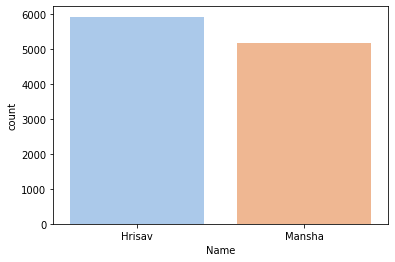

In [49]:
sns.set_palette('pastel')
sns.countplot(df_clean['Name'])

I am slightly ahead as of now :)

### Avg length of texts

In [50]:
print('Our combined avg length of texts: ', round(df_clean['Msg_Length'].mean(), 2))

Our combined avg length of texts:  19.36


In [51]:
print('Avg length of texts by Me: ', round(df_clean[df_clean['Name']=='Hrisav']['Msg_Length'].mean(), 2))

Avg length of texts by Me:  19.34


In [52]:
print('Avg length of texts by Mansha: ', round(df_clean[df_clean['Name']=='Mansha']['Msg_Length'].mean(), 2))

Avg length of texts by Mansha:  19.38


### How many times we talked about Corona?

In [53]:
search_words = ['corona', 'Corona']
df_clean[df_clean['Message'].str.contains('|'.join(search_words))]

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length
2361,Mansha,Hahaha is bc corona ne Jina Muskil or liya,15/03/2021,23:52,23,Evening,15,Mar,2021,Monday,Mar 2021,42
2380,Mansha,Corona yar pura watt laga dala,15/03/2021,23:56,23,Evening,15,Mar,2021,Monday,Mar 2021,30
4045,Mansha,Isbar solo jaungi if this corona thik ho gya na,08/04/2021,01:52,1,Night,8,Apr,2021,Thursday,Apr 2021,47
5249,Hrisav,Wish corona wsnt there,12/04/2021,12:40,12,Morning,12,Apr,2021,Monday,Apr 2021,22
5812,Mansha,Fir corona ka scene nhi hua toh den done aur b...,14/04/2021,16:50,16,Afternoon,14,Apr,2021,Wednesday,Apr 2021,60
5813,Hrisav,Corona toh brte jaenge,14/04/2021,16:50,16,Afternoon,14,Apr,2021,Wednesday,Apr 2021,22
5899,Mansha,Pray karo na corona chala jye,14/04/2021,20:47,20,Evening,14,Apr,2021,Wednesday,Apr 2021,29
8982,Hrisav,Ye corona variant bahut bekar hai,15/05/2021,00:21,0,Night,15,May,2021,Saturday,May 2021,33


### Day of Week message summary

In [54]:
df_clean.groupby(['DayofWeek']).size()

DayofWeek
Friday       1735
Monday       1397
Saturday     1473
Sunday       1194
Thursday     1772
Tuesday      1657
Wednesday    1855
dtype: int64

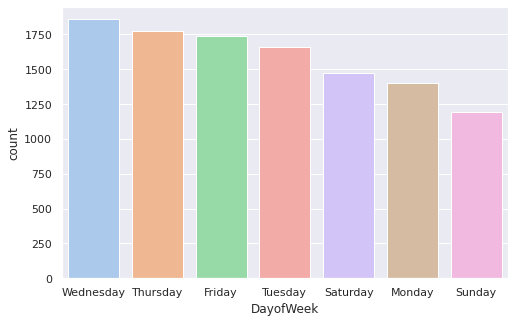

In [55]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set_palette('pastel')
sns.countplot(df_clean['DayofWeek'], order = df_clean['DayofWeek'].value_counts().index)

We don't talk much on weekends, and it's evident too from the graph. Well, Wednesday to Friday seems to be our talkative day! Mid week lethargy from studies could be a reason.

### Which hour we text the most?

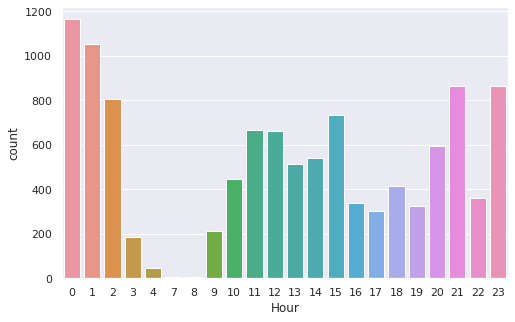

In [56]:
sns.set_palette('pastel')
sns.countplot(df_clean['Hour'])

Seems like we converse most post midnight!

### Day of week vs Time of day

In [57]:
tab = df_clean.groupby(['Hour', 'DayofWeek'])['Message'].size().reset_index()
tab.head()

,Hour,DayofWeek,Message
0,0,Friday,160
1,0,Monday,107
2,0,Saturday,282
3,0,Sunday,243
4,0,Thursday,139


In [58]:
pivot_tab = tab.pivot('Hour', 'DayofWeek', 'Message')
pivot_tab

DayofWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour,,,,,,,
0,160.0,107.0,282.0,243.0,139.0,163.0,68.0
1,128.0,135.0,219.0,26.0,343.0,160.0,42.0
2,2.0,66.0,161.0,205.0,330.0,8.0,34.0
3,18.0,11.0,42.0,41.0,NaN,71.0,1.0
4,4.0,1.0,23.0,11.0,3.0,2.0,NaN
7,NaN,NaN,4.0,NaN,NaN,NaN,1.0
8,1.0,2.0,NaN,NaN,NaN,4.0,NaN
9,41.0,39.0,15.0,4.0,11.0,19.0,85.0
10,81.0,37.0,66.0,15.0,80.0,73.0,95.0


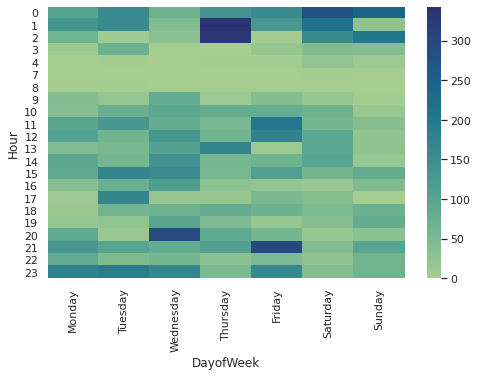

In [59]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.heatmap(pivot_tab[days].fillna(0), cmap='crest')

Heatmap shows 'Hour of the Day' vs 'Day of the Week' shades. Lighter shades prevalent on the morning time throughout the week, as we generally wake up post 9 AM :) 

### Month wise message summary

In [60]:
df_clean.groupby(['Year','Month']).size()

Year  Month
2020  Dec       227
      Nov        45
      Oct        23
2021  Apr      5049
      Feb      1130
      Jan       587
      Jun       509
      Mar       786
      May      2727
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

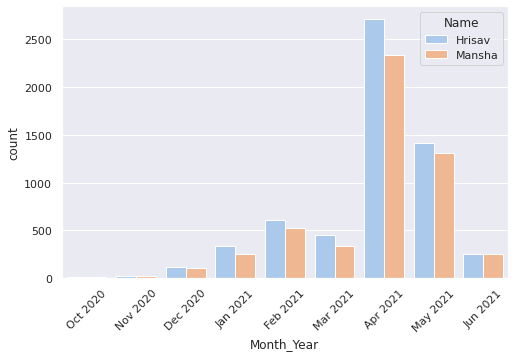

In [61]:
sns.set_palette('pastel')
sns.countplot(x ='Month_Year', hue = 'Name', data = df_clean)
plt.xticks(rotation=45)

Hmm.. so the spike has been in April!

### Which period of day we text most?

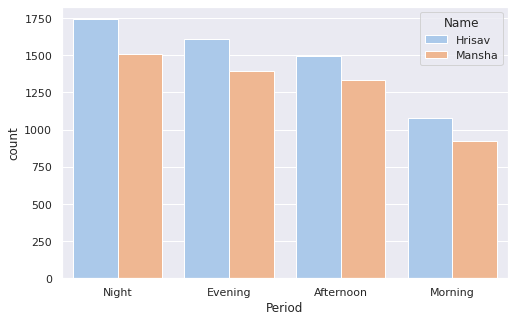

In [62]:
sns.set_palette('pastel')
sns.countplot(x ='Period', hue = 'Name', data = df_clean, order = df_clean['Period'].value_counts().index)

As the sun sets, our text frequency increases.

### Which were the top 10 active days?

In [63]:
dates = df_clean.groupby(['Date']).size()
type(dates)

pandas.core.series.Series

In [64]:
dates = dates.to_frame()
dates.head()

,0
Date,
01/01/2021,2
01/04/2021,7
01/05/2021,88
01/06/2021,33
02/02/2021,19


In [65]:
dates = dates.rename(columns = {0:'Count'})
dates = dates.reset_index()
dates.head()

,Date,Count
0,01/01/2021,2
1,01/04/2021,7
2,01/05/2021,88
3,01/06/2021,33
4,02/02/2021,19


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

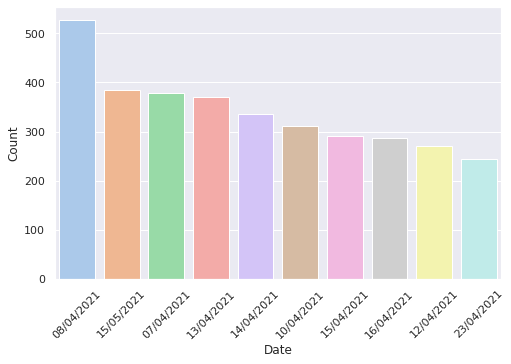

In [66]:
dates = dates.sort_values(by=['Count'],ascending=False).head(10)
sns.barplot(x = 'Date', y = 'Count', data = dates)
plt.xticks(rotation=45)

500+ texts on 8th April! Goodness.. need to find out what was special!

In [67]:
df_clean[df_clean['Date']=='08/04/2021']

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length
3812,Hrisav,Wtf,08/04/2021,00:00,0,Night,8,Apr,2021,Thursday,Apr 2021,3
3813,Hrisav,Sabko itna jldi kiu hai,08/04/2021,00:00,0,Night,8,Apr,2021,Thursday,Apr 2021,23
3814,Mansha,Wahi,08/04/2021,00:00,0,Night,8,Apr,2021,Thursday,Apr 2021,4
3815,Mansha,Tum bhi kar lo,08/04/2021,00:24,0,Night,8,Apr,2021,Thursday,Apr 2021,14
3816,Hrisav,Mera 2023,08/04/2021,00:28,0,Night,8,Apr,2021,Thursday,Apr 2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Mansha,thanku 😇\,08/04/2021,16:01,16,Afternoon,8,Apr,2021,Thursday,Apr 2021,9
4336,Hrisav,chaap,08/04/2021,16:02,16,Afternoon,8,Apr,2021,Thursday,Apr 2021,5
4337,Mansha,Sticker man,08/04/2021,21:02,21,Evening,8,Apr,2021,Thursday,Apr 2021,11
4338,Mansha,Good One!!,08/04/2021,21:08,21,Evening,8,Apr,2021,Thursday,Apr 2021,10


### Plotting April Graph

In [68]:
april = df_clean[df_clean['Month_Year']=='Apr 2021']
april.head()

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length
2798,Mansha,Arey nhi h baba,01/04/2021,10:55,10,Morning,1,Apr,2021,Thursday,Apr 2021,15
2799,Mansha,Kisiko puch to,01/04/2021,10:59,10,Morning,1,Apr,2021,Thursday,Apr 2021,14
2800,Mansha,https://drive.google.com/drive/u/1/folders/0AL...,01/04/2021,22:35,22,Evening,1,Apr,2021,Thursday,Apr 2021,62
2801,Mansha,demd ka h 8th session,01/04/2021,22:35,22,Evening,1,Apr,2021,Thursday,Apr 2021,21
2802,Mansha,check,01/04/2021,22:35,22,Evening,1,Apr,2021,Thursday,Apr 2021,5


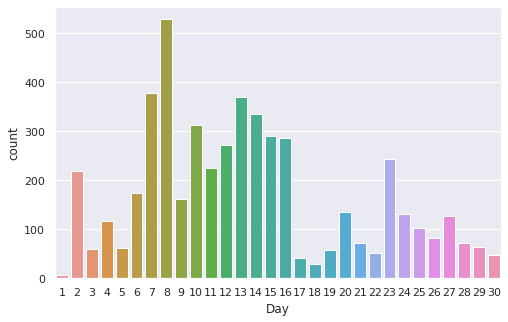

In [69]:
sns.set_palette('pastel')
sns.countplot(april['Day'])

Hahaha.. number of text messages declined as we started video calling more often post 16th April.

### Distribution of Message Length

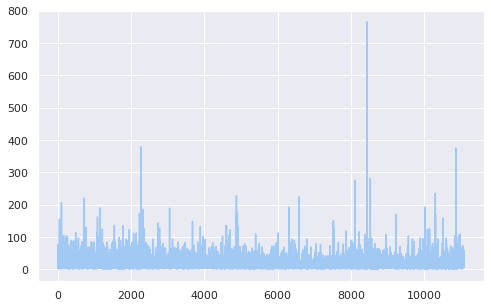

In [70]:
sns.set_palette('pastel')
df_clean['Msg_Length'].plot.line()

In [71]:
df_clean['Msg_Length'].max()

765

In [72]:
df_clean[df_clean['Msg_Length']==765]

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length
8432,Hrisav,We extensively use R-Shiny and Python-Bokeh/Da...,09/05/2021,02:27,2,Night,9,May,2021,Sunday,May 2021,765


([], <a list of 0 Text major ticklabel objects>)

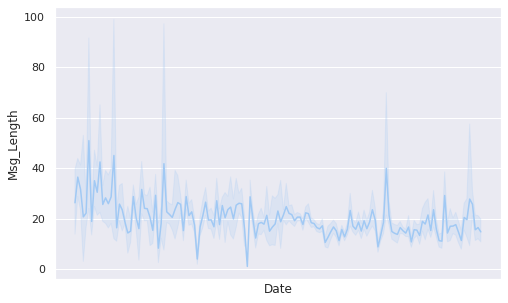

In [73]:
sns.lineplot(df_clean['Date'], df_clean['Msg_Length'])
plt.xticks([])

### Who took other's name more?

In [74]:
searchfor = ['Mansh', 'mansh']
op = df_clean[df_clean['Message'].str.contains('|'.join(searchfor))].shape[0]

print(f'I took her name {op} times.')

I took her name 129 times.


In [75]:
searchfor = ['Hrisa', 'hrisa']
op = df_clean[df_clean['Message'].str.contains('|'.join(searchfor))].shape[0]

print(f'She took my name {op} times.')

She took my name 82 times.


## Emojis

In [76]:
df_clean[df_clean['Message'].str.contains('🤣')].tail()

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length
10707,Hrisav,🤣🤣,03/06/2021,00:24,0,Night,3,Jun,2021,Thursday,Jun 2021,2
11012,Hrisav,🤣🤣🤣,11/06/2021,00:09,0,Night,11,Jun,2021,Friday,Jun 2021,3
11033,Hrisav,can u post like this? 🤣,11/06/2021,23:36,23,Evening,11,Jun,2021,Friday,Jun 2021,23
11036,Hrisav,🤣🤣,11/06/2021,23:38,23,Evening,11,Jun,2021,Friday,Jun 2021,2
11038,Hrisav,🤣🤣🤣,11/06/2021,23:39,23,Evening,11,Jun,2021,Friday,Jun 2021,3


In [77]:
df_clean['Emoji_Name'] = [str(list(demoji.findall(str(df_clean.loc[i,'Message'])).values())) for i in range(len(df_clean))]
df_clean['Emoji'] = [str(list(demoji.findall(str(df_clean.loc[i,'Message'])).keys())) for i in range(len(df_clean))]

In [78]:
df_clean[df_clean['Message'].str.contains('🤣')].head()

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length,Emoji_Name,Emoji
3,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38,11,Morning,20,Oct,2020,Tuesday,Oct 2020,73,['rolling on the floor laughing'],['🤣']
9,Hrisav,oohoo 🤣,20/10/2020,12:38,12,Morning,20,Oct,2020,Tuesday,Oct 2020,7,['rolling on the floor laughing'],['🤣']
189,Hrisav,🤣🤣🤣,19/12/2020,16:43,16,Afternoon,19,Dec,2020,Saturday,Dec 2020,3,['rolling on the floor laughing'],['🤣']
193,Hrisav,🤣🤣🤣,19/12/2020,16:49,16,Afternoon,19,Dec,2020,Saturday,Dec 2020,3,['rolling on the floor laughing'],['🤣']
211,Hrisav,dont worry tumhara placement ke baad treat lun...,20/12/2020,12:00,12,Morning,20,Dec,2020,Sunday,Dec 2020,61,['rolling on the floor laughing'],['🤣']


In [79]:
df_clean[df_clean['Message'].str.contains('❤')].head()

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length,Emoji_Name,Emoji
525,Mansha,🙏🙏Thanks ❤️❤️,11/01/2021,14:59,14,Afternoon,11,Jan,2021,Monday,Jan 2021,13,"['folded hands', 'red heart']","['🙏', '❤️']"
631,Mansha,thanku... ❤️❤️,17/01/2021,10:42,10,Morning,17,Jan,2021,Sunday,Jan 2021,14,['red heart'],['❤️']
693,Mansha,correct..Thanks❤️❤️,20/01/2021,20:35,20,Evening,20,Jan,2021,Wednesday,Jan 2021,19,['red heart'],['❤️']
698,Hrisav,❤️❤️✅✅,20/01/2021,20:44,20,Evening,20,Jan,2021,Wednesday,Jan 2021,6,"['check mark button', 'red heart']","['✅', '❤️']"
706,Mansha,Thanks❤️❤️.means alot,21/01/2021,18:39,18,Afternoon,21,Jan,2021,Thursday,Jan 2021,21,['red heart'],['❤️']


In [80]:
df_clean['Emoji'].value_counts()

[]              9688
['😅']            294
['😂']            180
['❤️']           124
['🤣']            110
                ... 
['✅', '😆']         1
['😍', '👌']         1
['🤙🏼', '🙏🏼']       1
['🤬']              1
['😁', '😉']         1
Name: Emoji, Length: 138, dtype: int64

Data shows emoji and num of messages it has appeared in.

In [81]:
df_mansha = df_clean[(df_clean['Name'] == 'Mansha')]
df_hrisav = df_clean[(df_clean['Name'] == 'Hrisav')]

In [82]:
emo_mansha = ['😅', '❤️', '😂', '😭', '🙏', '🙈', '🤣']
emo_mcount = []

for emo in emo_mansha:
  emo_mcount.append(len(df_mansha[df_mansha['Emoji'].str.contains(emo)]))

dic = {'Emoji':emo_mansha, 'M_Count':emo_mcount}
df_emo_mansha = pd.DataFrame(dic, columns = ['Emoji', 'M_Count'])
df_emo_mansha.sort_values(by=['M_Count'], ascending=False)

,Emoji,M_Count
0,😅,233
1,❤️,108
2,😂,70
3,😭,51
5,🙈,43
4,🙏,42
6,🤣,36


Mansha cries a lot, check the 4th row.. lol!

In [83]:
emo_hrisav = ['😅', '❤️', '😂', '🙏', '😏', '🤣', '😀']
emo_hcount = []

for emo in emo_hrisav:
  emo_hcount.append(len(df_hrisav[df_hrisav['Emoji'].str.contains(emo)]))

dic = {'Emoji':emo_hrisav, 'H_Count':emo_hcount}
df_emo_hrisav = pd.DataFrame(dic, columns = ['Emoji', 'H_Count'])
df_emo_hrisav.sort_values(by=['H_Count'], ascending=False, ignore_index=True)

,Emoji,H_Count
0,😂,116
1,🤣,81
2,😅,80
3,🙏,56
4,😀,38
5,❤️,37
6,😏,35


I am the relaxed one haha..

In [84]:
emo_merge = pd.merge(df_emo_mansha, df_emo_hrisav, on='Emoji')
emo_merge

,Emoji,M_Count,H_Count
0,😅,233,80
1,❤️,108,37
2,😂,70,116
3,🙏,42,56
4,🤣,36,81


Ahaa.. she uses the heart sign so much!!

## Word Cloud

In [85]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['han','haa','ha','mai','mein','wo','pe','https','www','zoom',\
 'ni','nahi','nhi','na','toh','to','hi','he','so','hu','hum','gye','gya','folders','pva',\
 'kar','ye','se','kuch','ki','are','aur','ya','ek','is','hun','kr','com','youtube',\
 'ko','h','hai','ho','hn','bt','no','and','bhai','not','do','ke','ur','google', 'drive',\
 'ka','k','ab','kya','tha','m','bhi','rhi','thi','rha','me','but','sry','r','u','v']
stopwords.extend(newStopWords)
stopwords = set(stopwords)

In [86]:
def clean(msg):
    msg = re.sub('[^a-zA-Z]', ' ', msg)       # removing everything other than alphabets
    msg = msg.lower()
    return msg

In [87]:
df_clean['Message_Upd'] = pd.DataFrame(df_clean['Message'].apply(lambda x: clean(x)))
df_clean.head()

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length,Emoji_Name,Emoji,Message_Upd
0,Hrisav,sir is looking for u,20/10/2020,11:29,11,Morning,20,Oct,2020,Tuesday,Oct 2020,20,[],[],sir is looking for u
1,Mansha,opp,20/10/2020,11:36,11,Morning,20,Oct,2020,Tuesday,Oct 2020,3,[],[],opp
2,Mansha,yar net kat gaya,20/10/2020,11:37,11,Morning,20,Oct,2020,Tuesday,Oct 2020,16,[],[],yar net kat gaya
3,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38,11,Morning,20,Oct,2020,Tuesday,Oct 2020,73,['rolling on the floor laughing'],['🤣'],sir ko txt kr diyo else firse class ke baad ...
4,Mansha,k k.. thanks,20/10/2020,11:38,11,Morning,20,Oct,2020,Tuesday,Oct 2020,12,[],[],k k thanks


### What does Mansha talk about most?

In [88]:
mansha = df_clean[(df_clean['Name'] == 'Mansha')][['Message_Upd']]['Message_Upd'].to_string()

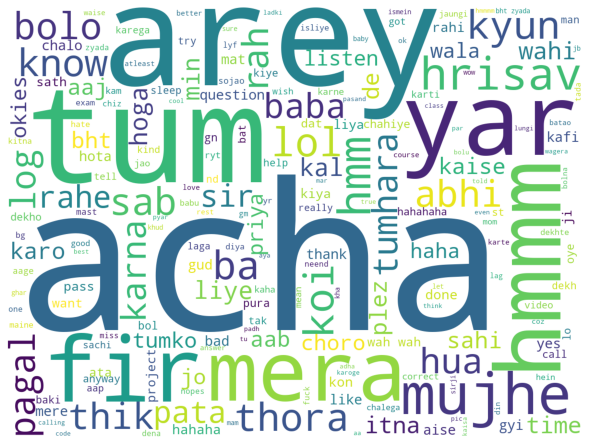

In [89]:
wc = WordCloud(
                              background_color='white',
                              stopwords=stopwords,
                              width=1200,
                              height=900,
                              max_words=200,
                             )
wc.generate(mansha)

plt.figure( figsize=(12,6), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### What do I talk about?

In [90]:
hrisav = df_clean[(df_clean['Name'] == 'Hrisav')][['Message_Upd']]['Message_Upd'].to_string()

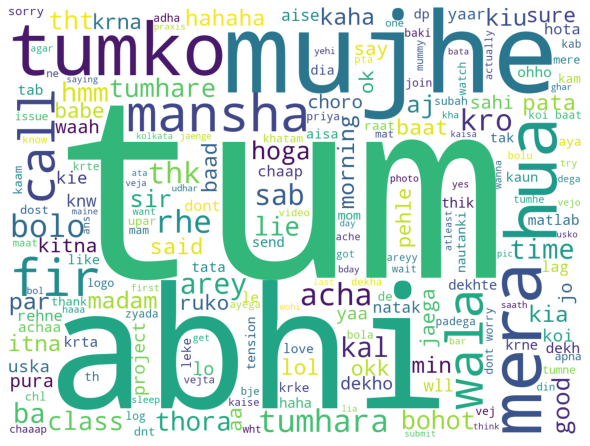

In [91]:
wc = WordCloud(
                              background_color='white',
                              stopwords=stopwords,
                              width=1200,
                              height=900,
                              max_words=200,
                             )
wc.generate(hrisav)

plt.figure( figsize=(12,6), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### What do we both talk about?

In [92]:
text = df_clean['Message_Upd'].to_string()

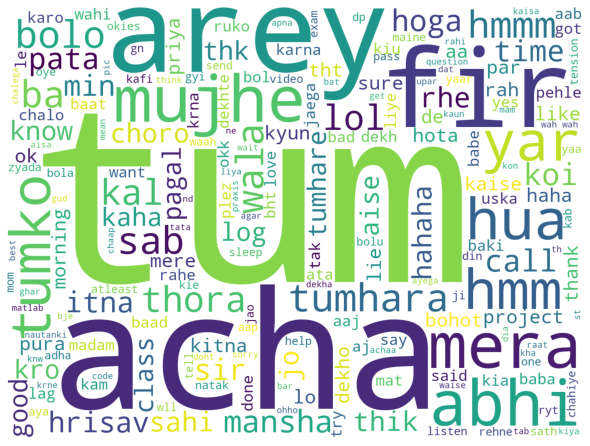

In [93]:
wc = WordCloud(
                              background_color='white',
                              stopwords=stopwords,
                              width=1200,
                              height=900,
                              max_words=200,
                             )
wc.generate(text)

plt.figure( figsize=(12,6), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Frequency Distribution

In [94]:
df_clean.head()

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length,Emoji_Name,Emoji,Message_Upd
0,Hrisav,sir is looking for u,20/10/2020,11:29,11,Morning,20,Oct,2020,Tuesday,Oct 2020,20,[],[],sir is looking for u
1,Mansha,opp,20/10/2020,11:36,11,Morning,20,Oct,2020,Tuesday,Oct 2020,3,[],[],opp
2,Mansha,yar net kat gaya,20/10/2020,11:37,11,Morning,20,Oct,2020,Tuesday,Oct 2020,16,[],[],yar net kat gaya
3,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38,11,Morning,20,Oct,2020,Tuesday,Oct 2020,73,['rolling on the floor laughing'],['🤣'],sir ko txt kr diyo else firse class ke baad ...
4,Mansha,k k.. thanks,20/10/2020,11:38,11,Morning,20,Oct,2020,Tuesday,Oct 2020,12,[],[],k k thanks


In [95]:
raw = []
for word in df_clean['Message_Upd']:
    token = nltk.word_tokenize(word)
    raw.extend(token)

In [96]:
raw_upd = [w for w in raw if w not in stopwords and w not in string.punctuation and len(w)>2]

In [97]:
# stop words included

fdist = FreqDist(raw)
fdist.most_common(10)

[('nhi', 840),
 ('u', 777),
 ('hai', 768),
 ('h', 744),
 ('i', 727),
 ('ho', 566),
 ('kya', 446),
 ('toh', 445),
 ('na', 441),
 ('tum', 423)]

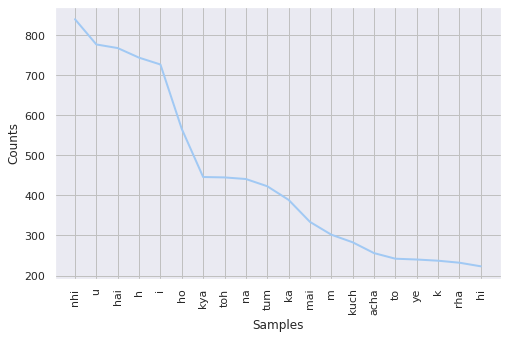

In [98]:
fdist.plot(20)

In [99]:
# stop words removed

fdist = FreqDist(raw_upd)
fdist.most_common(10)

[('tum', 423),
 ('acha', 256),
 ('arey', 217),
 ('fir', 200),
 ('mujhe', 189),
 ('mera', 184),
 ('abhi', 182),
 ('hua', 141),
 ('yar', 136),
 ('tumko', 134)]

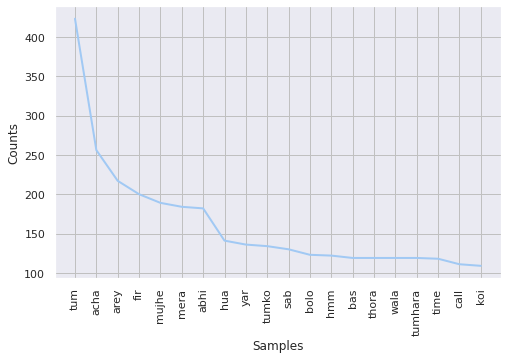

In [100]:
fdist.plot(20)

## Bigrams

In [101]:
# stop words included

fdist = FreqDist(bigrams(raw))
fdist.most_common(10)

[(('rha', 'hai'), 71),
 (('kuch', 'nhi'), 71),
 (('rhe', 'ho'), 65),
 (('i', 'will'), 64),
 (('rha', 'hu'), 59),
 (('thk', 'hai'), 57),
 (('ho', 'gya'), 54),
 (('i', 'am'), 53),
 (('nhi', 'h'), 48),
 (('h', 'na'), 42)]

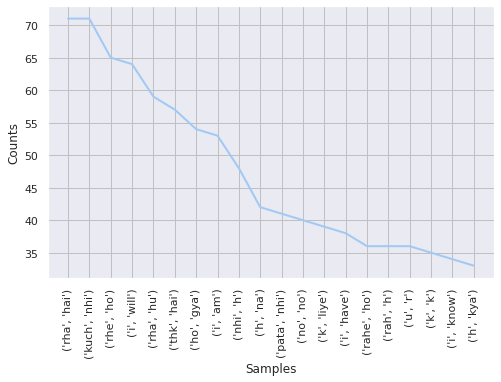

In [102]:
fdist.plot(20)

In [103]:
# stop words removed

fdist = FreqDist(bigrams(raw_upd))
fdist.most_common(10)

[(('wah', 'wah'), 25),
 (('dont', 'worry'), 20),
 (('koi', 'baat'), 18),
 (('bht', 'zyada'), 15),
 (('abhi', 'tak'), 11),
 (('tum', 'log'), 11),
 (('mere', 'sath'), 11),
 (('lets', 'see'), 10),
 (('thanks', 'yar'), 9),
 (('arey', 'arey'), 9)]

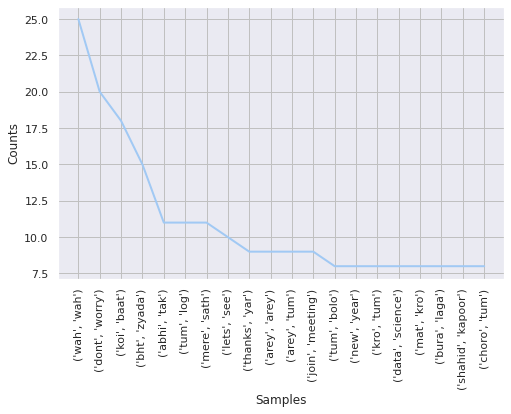

In [104]:
fdist.plot(20)

Checking out the consecutive words we say.

## Trigrams

In [105]:
# stop words included

fdist = FreqDist(trigrams(raw))
fdist.most_common(10)

[(('com', 'watch', 'v'), 19),
 (('https', 'www', 'youtube'), 18),
 (('www', 'youtube', 'com'), 18),
 (('youtube', 'com', 'watch'), 18),
 (('kr', 'rhe', 'ho'), 15),
 (('koi', 'baat', 'nhi'), 15),
 (('i', 'don', 't'), 15),
 (('google', 'com', 'drive'), 14),
 (('aa', 'rha', 'hai'), 14),
 (('i', 'love', 'u'), 14)]

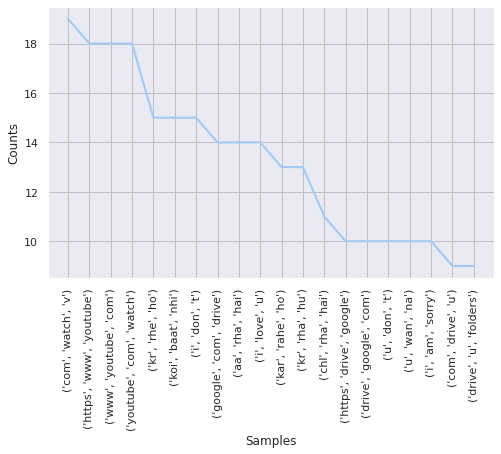

In [106]:
fdist.plot(20)

In [107]:
# stop words removed

fdist = FreqDist(trigrams(raw_upd))
fdist.most_common(5)

[(('natak', 'mat', 'kro'), 4),
 (('bht', 'zyada', 'bol'), 3),
 (('name', 'change', 'krke'), 3),
 (('happy', 'new', 'year'), 3),
 (('aml', 'open', 'book'), 3)]

## Ngrams

In [108]:
# stop words included

fdist = FreqDist(ngrams(raw, 4))
fdist.most_common(10)

[(('https', 'www', 'youtube', 'com'), 18),
 (('www', 'youtube', 'com', 'watch'), 18),
 (('youtube', 'com', 'watch', 'v'), 18),
 (('https', 'drive', 'google', 'com'), 10),
 (('drive', 'google', 'com', 'drive'), 9),
 (('google', 'com', 'drive', 'u'), 9),
 (('com', 'drive', 'u', 'folders'), 9),
 (('drive', 'u', 'folders', 'alxgjzumqqxruk'), 9),
 (('u', 'folders', 'alxgjzumqqxruk', 'pva'), 9),
 (('i', 'don', 't', 'know'), 6)]

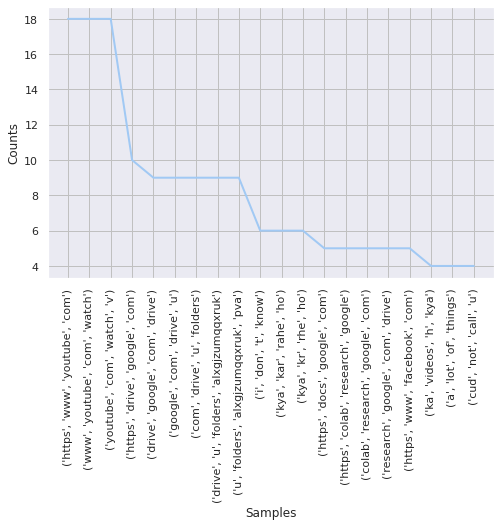

In [109]:
fdist.plot(20)